In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix , classification_report , confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
# Load Data training data
df=pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
#check the null values here
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
#check duplicated_values
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df["sc_w"] = df["sc_w"].replace(0, 8)
df["sc_w"] = df["sc_w"].replace(1, 8)
df["sc_w"] = df["sc_w"].replace(2, 8)
df["sc_w"] = df["sc_w"].replace(3, 8)
df["sc_w"] = df["sc_w"].replace(4, 8)
df["sc_w"] = df["sc_w"].replace(5, 8)
df["sc_w"] = df["sc_w"].replace(6, 8)
df["sc_w"] = df["sc_w"].replace(7, 8)

In [9]:
df["price_range"].unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
df[df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,8,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,8,7,1,1,0,1


In [11]:
# to drop that values of rows
df = df.drop(index=[1481, 1933])

In [12]:
#normalize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
df_n=pd.DataFrame()
for i in df.drop('price_range',axis=1).columns:
  df_n[[i]]=sc.fit_transform(df[[i]])

In [14]:
df_n.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902408,-0.990040,0.831187,-1.020224,-0.762045,-1.042964,-1.381577,0.340218,1.348694,-1.101425,-1.305011,-1.411193,-1.146590,0.392361,-0.785456,-0.478912,1.462354,-1.785687,-1.005018,0.985096
1,-0.494904,1.010061,-1.252055,0.980176,-0.992353,0.958806,1.154685,0.687031,-0.120434,-0.664181,-0.645575,0.584649,1.705553,0.467977,1.113610,-0.478912,-0.734062,0.560008,0.995007,-1.015129
2,-1.537567,1.010061,-1.252055,0.980176,-0.531737,0.958806,0.493052,1.380659,0.133839,0.210306,-0.645575,1.392007,1.075859,0.442157,-0.310689,-0.478912,-0.367993,0.560008,0.995007,-1.015129
3,-1.419186,1.010061,1.198818,-1.020224,-0.992353,-1.042964,-1.216168,1.033845,-0.261696,0.647549,-0.150997,1.286013,1.237913,0.595233,0.876227,-0.478912,-0.001924,0.560008,-1.005018,-1.015129
4,1.326342,1.010061,-0.394249,-1.020224,2.001650,0.958806,0.658460,0.340218,0.020829,-1.101425,0.673299,1.267971,-0.090927,-0.657038,-1.022839,-0.478912,0.730215,0.560008,0.995007,-1.015129


# Data visualiztion

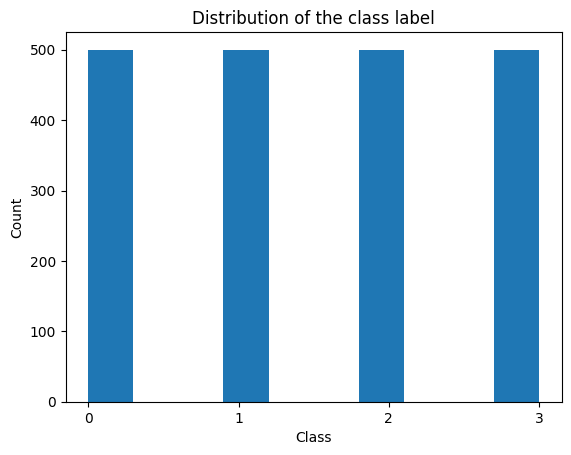

In [15]:
#the counts of the prices 
df_n['price_range']=df['price_range'].values
plt.hist(df_n.price_range)
plt.title("Distribution of the class label")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(np.arange(4))
plt.show()

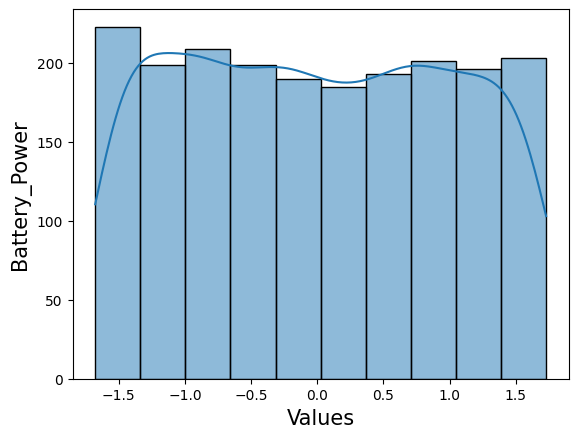

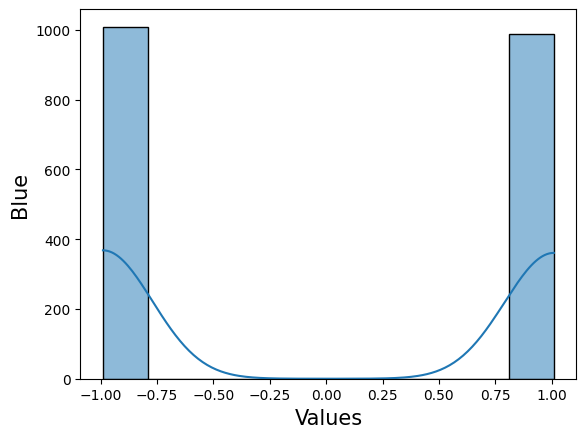

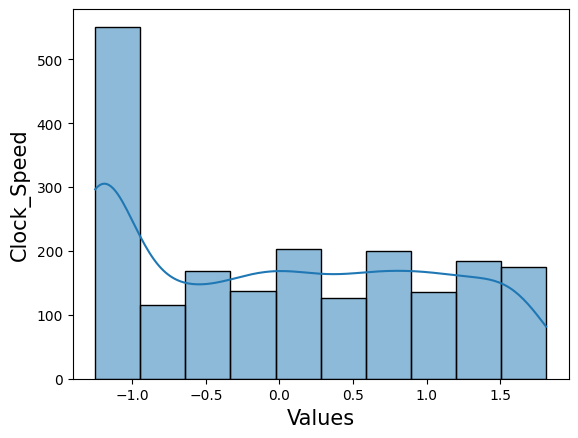

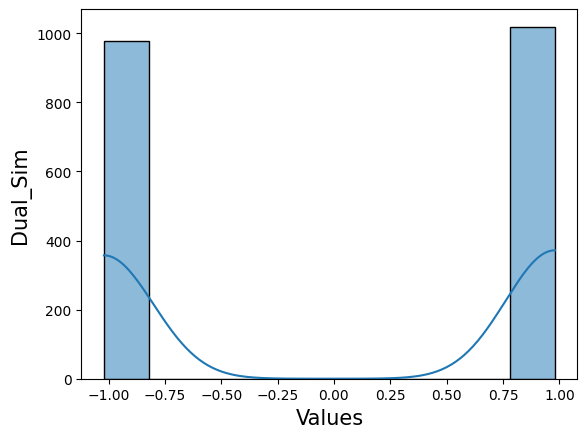

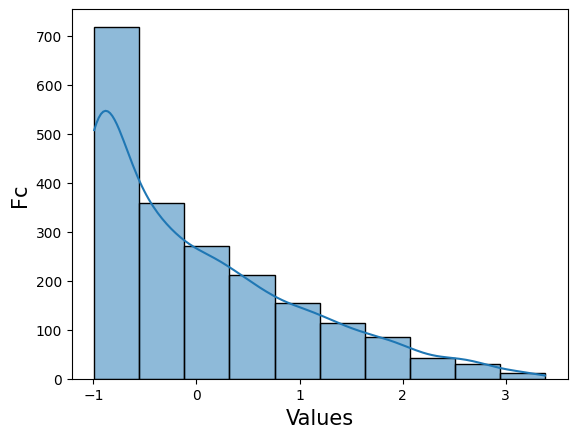

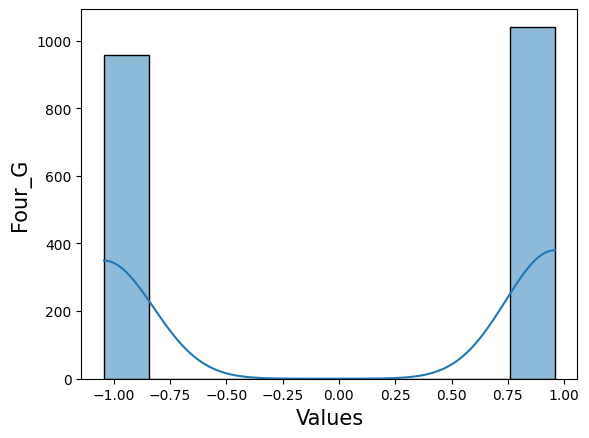

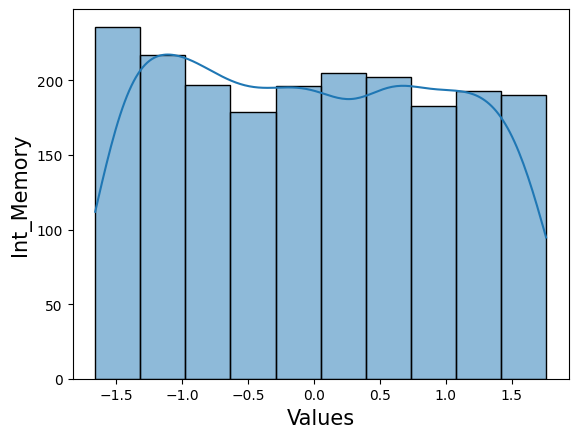

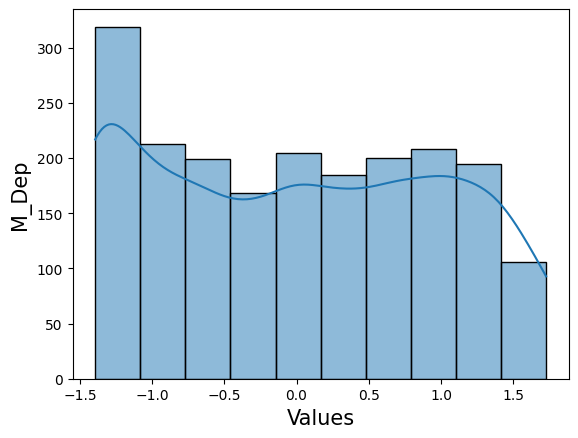

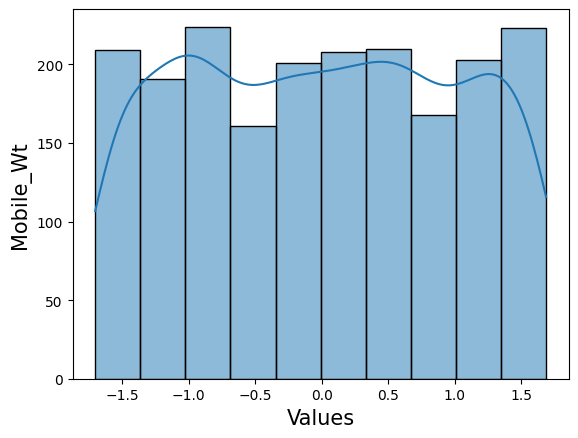

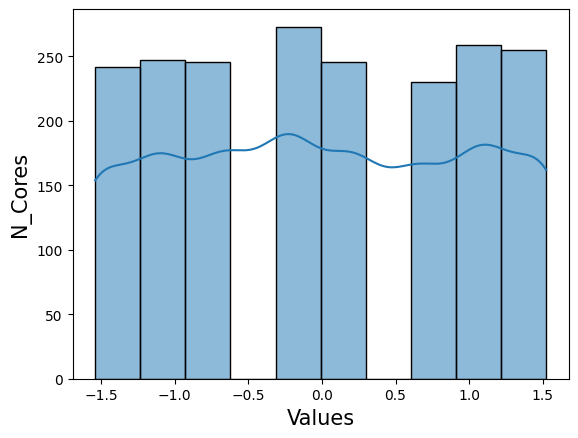

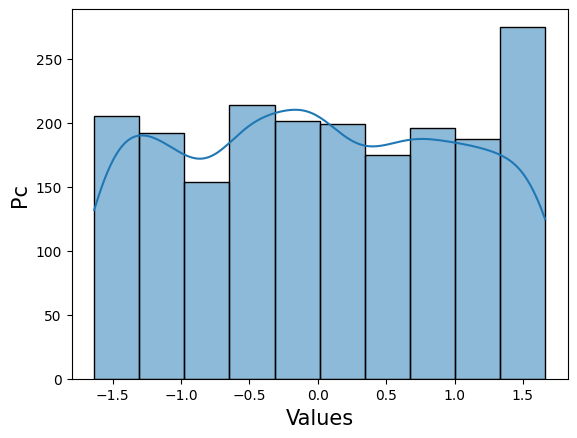

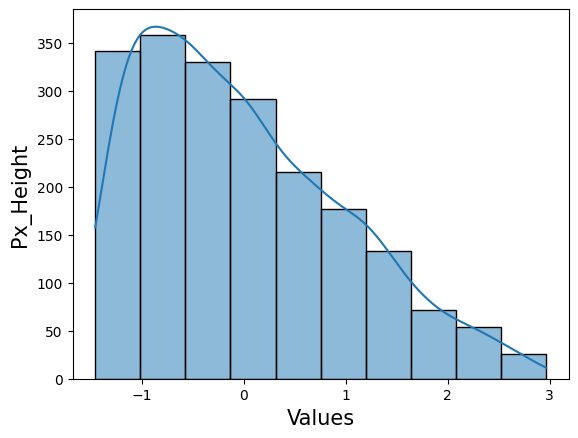

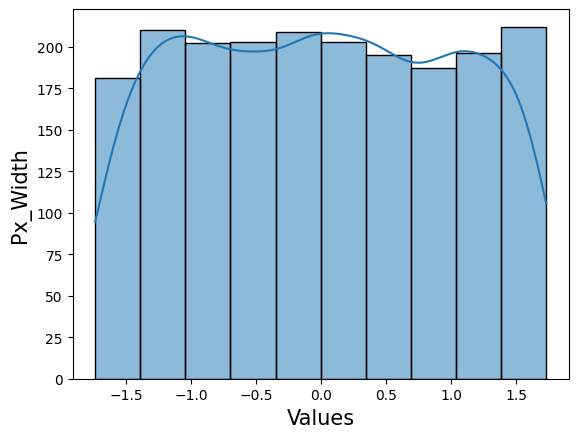

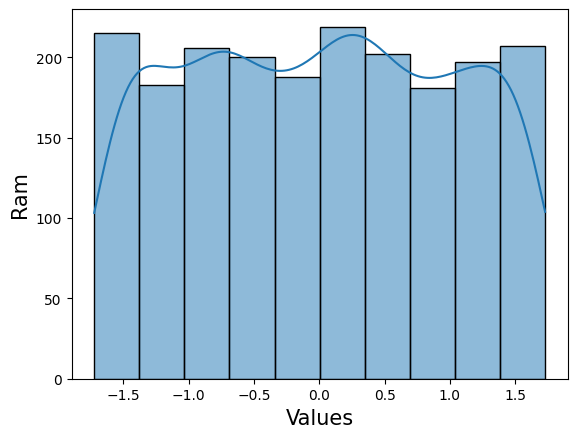

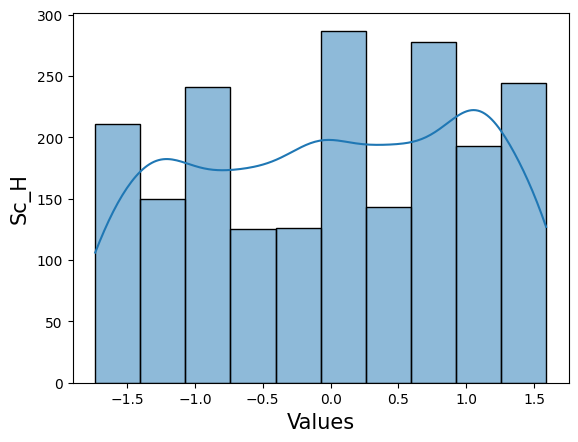

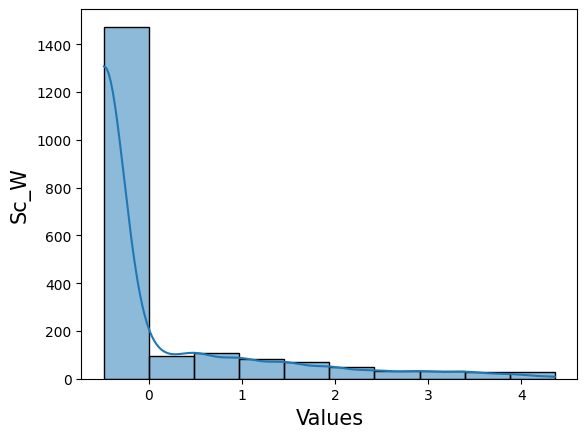

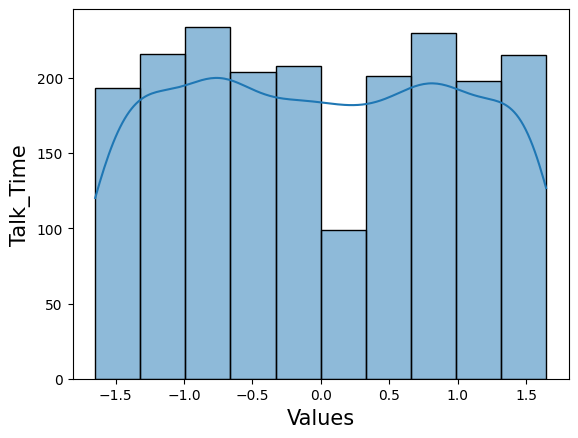

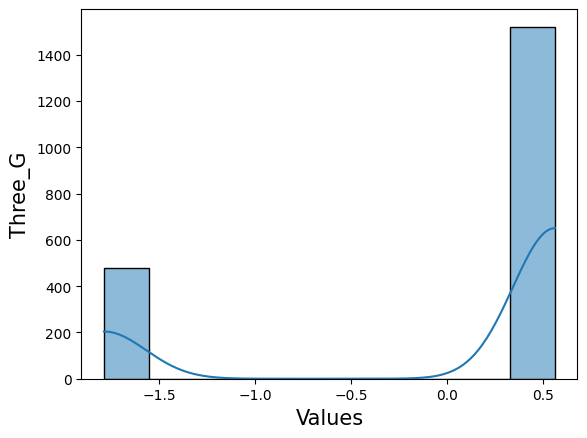

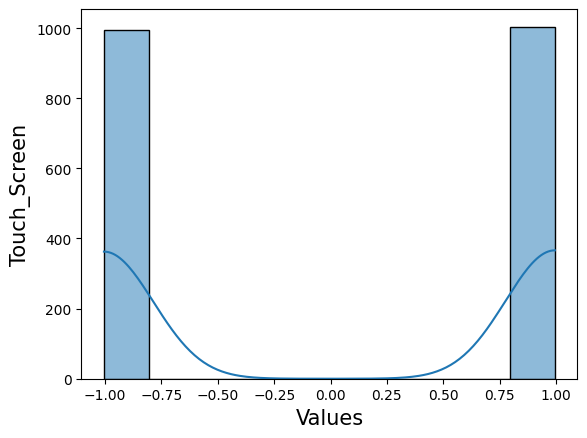

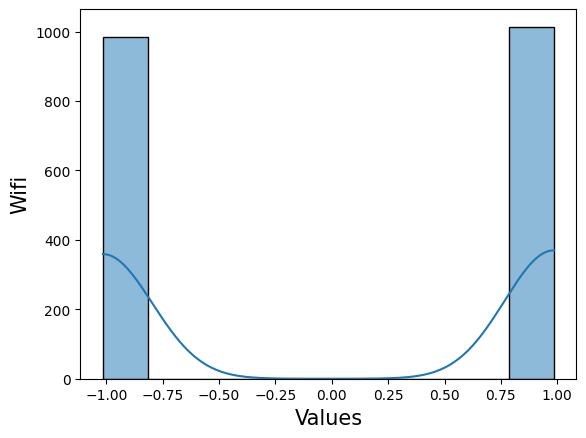

In [16]:
#checking the distribution of all the features in the dataset
columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
for col in columns:
    sns.histplot(df_n[col], kde=True, bins=10)
    
    plt.ylabel(col.title(),fontsize=15)
    plt.xlabel("Values",fontsize=15)
    plt.show()

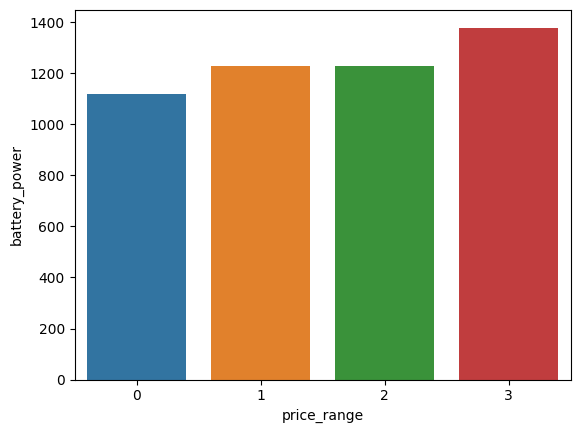

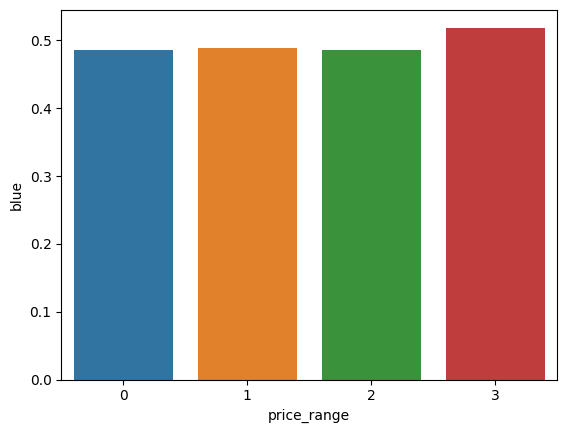

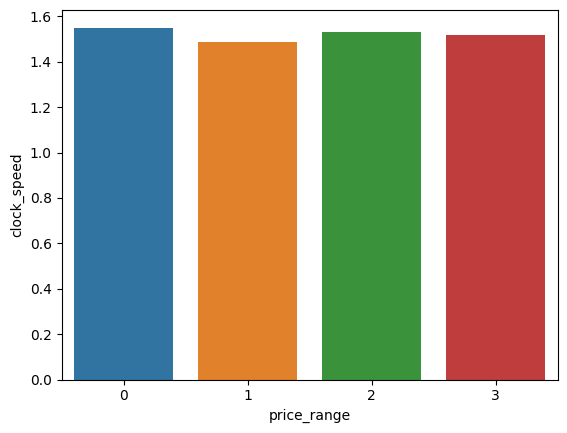

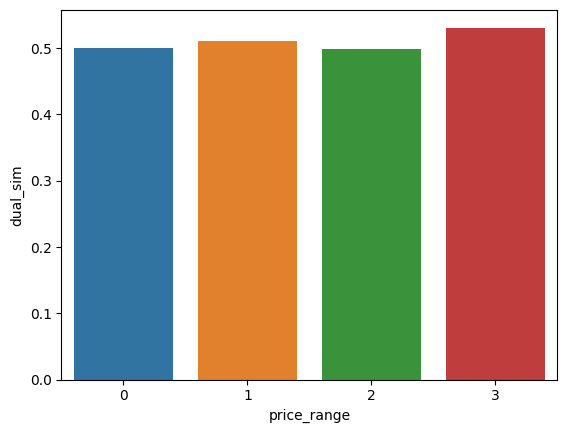

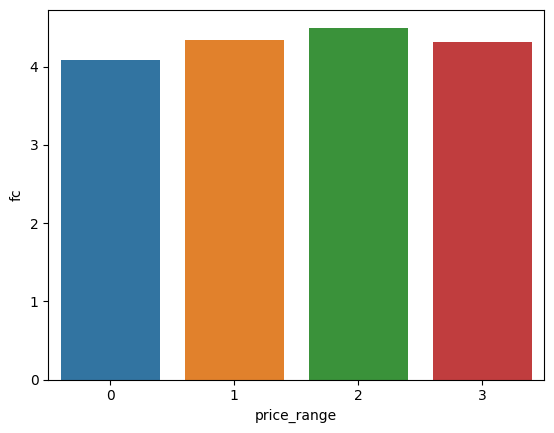

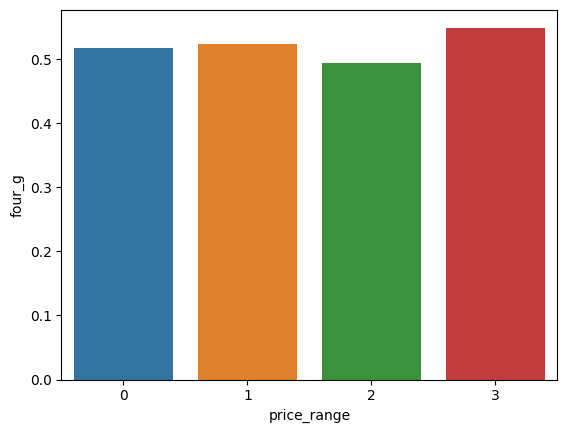

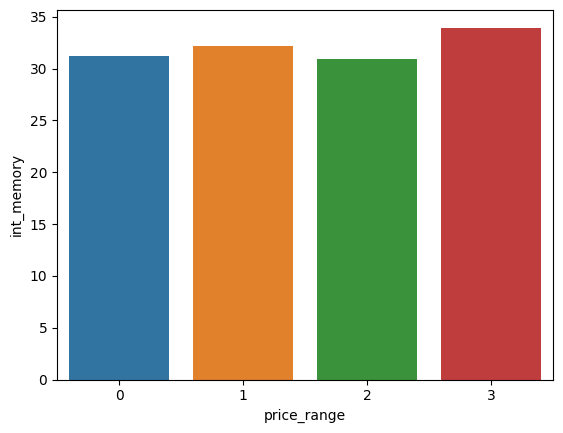

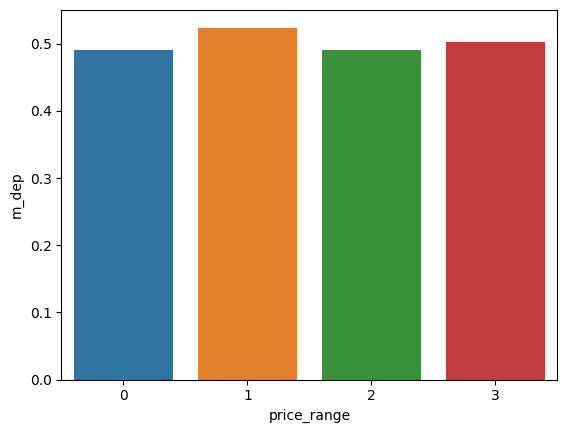

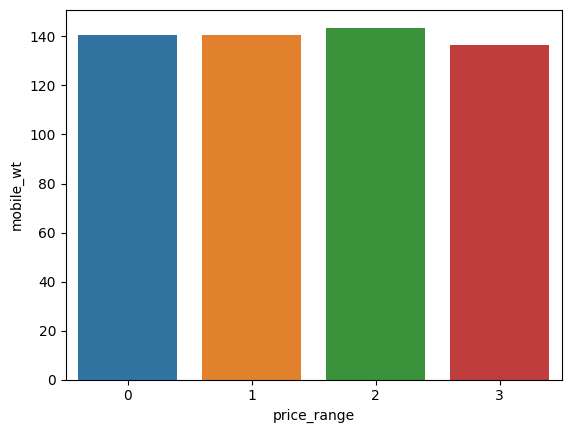

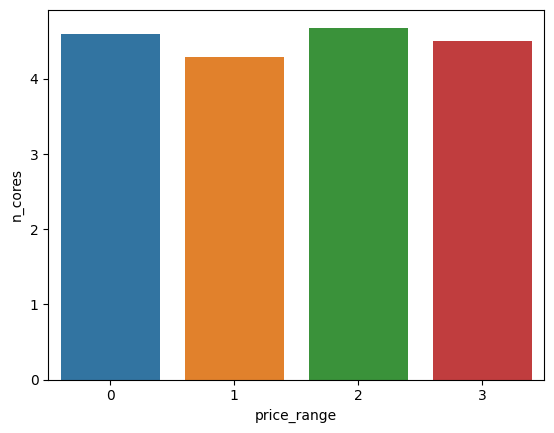

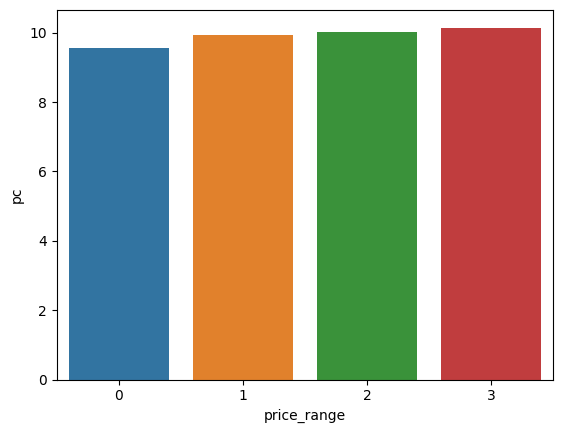

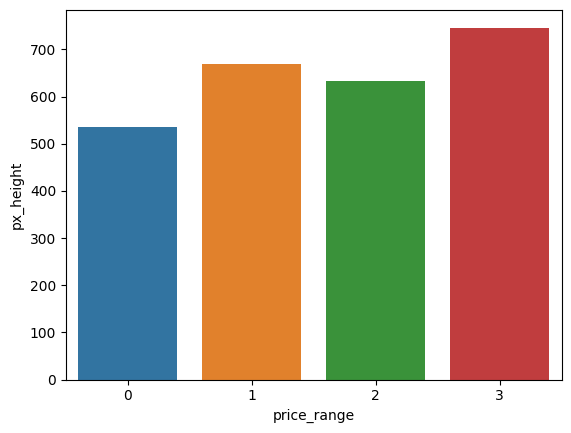

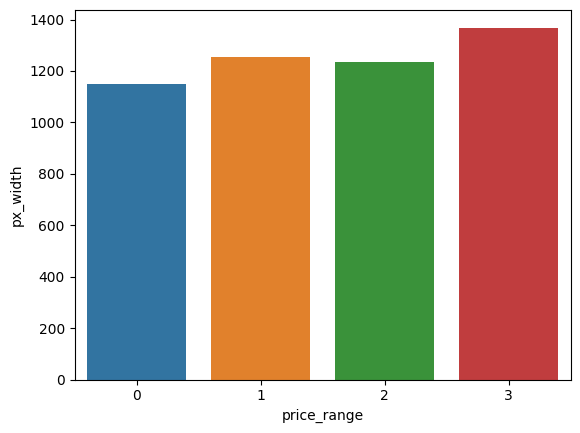

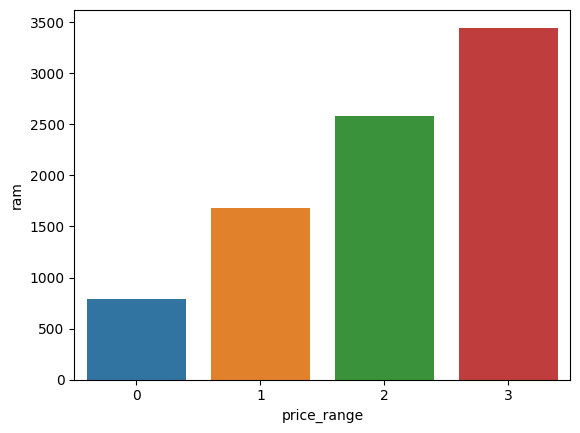

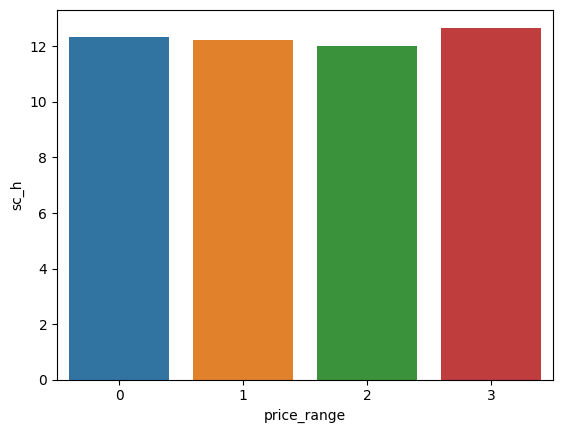

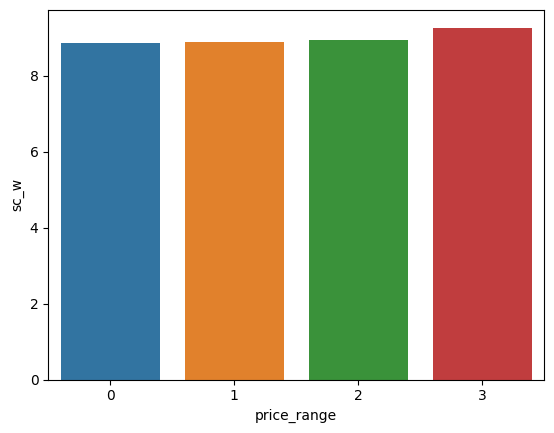

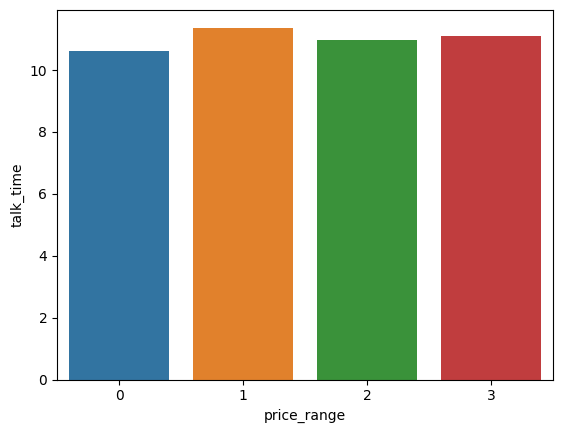

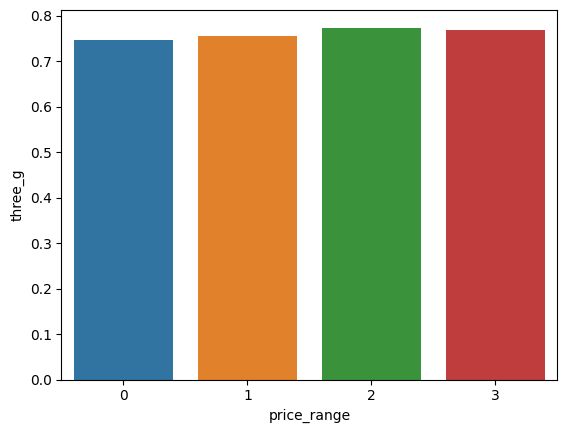

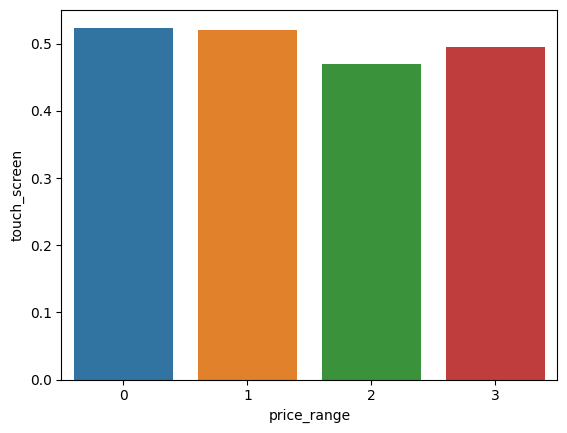

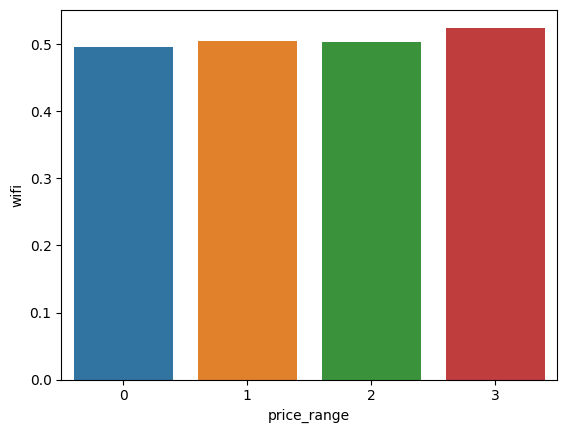

In [65]:
#From the above plot we can see that the class label column is pretty balanced as the classes are spread throughout the dataset equally


for colum in columns:
    if colum !='price_range':
        x=df.groupby('price_range')[colum].mean().to_frame().reset_index()

        sns.barplot(y=colum,x='price_range',data = x)
        plt.show()

# LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [18]:
x=df_n.drop('price_range',axis=1)
y = df_n["price_range"].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
model.fit(X_train,Y_train)

LogisticRegression()

LGC result:
Accuracy:  0.9366666666666666
f1_score:  0.9365727549492643
Precision:  0.9366941463320912
Recall:  0.9366666666666666


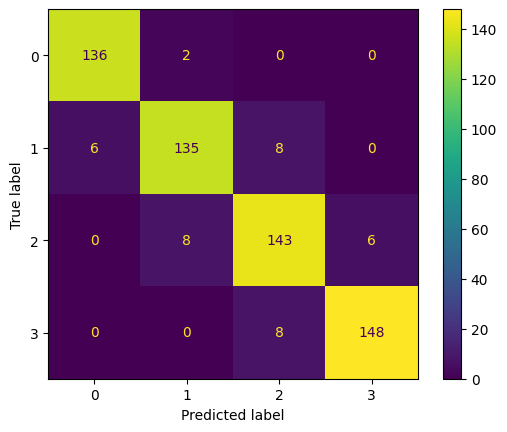

In [20]:
Y_test_Predicted=model.predict(X_test)

plot_confusion_matrix(model,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_test_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_test_Predicted,average='weighted'))

In [21]:
print("Y_test: ",Y_test[:5])
print("Y_test_pre: ",Y_test_Predicted[:5])

Y_test:  [[2]
 [0]
 [0]
 [2]
 [1]]
Y_test_pre:  [3 0 0 2 1]


# K_Nearest _Neighbour

In [22]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [23]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

LGC result:
Accuracy:  0.49833333333333335
f1_score:  0.4979771835522911
Precision:  0.5087148205883917
Recall:  0.49833333333333335


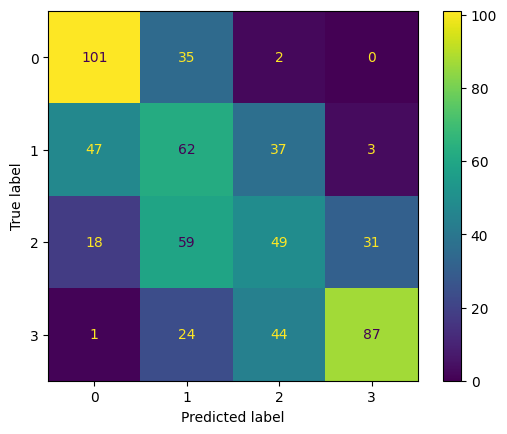

In [24]:
Y_pred_test=knn.predict(X_test)

plot_confusion_matrix(knn,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_pred_test))
print('f1_score: ',f1_score(Y_test,Y_pred_test,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_pred_test,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_pred_test,average='weighted'))

In [25]:
Y_pred_test[:5]

array([2, 0, 0, 3, 0], dtype=int64)

In [82]:
Y_test[:5]

array([[2],
       [0],
       [0],
       [2],
       [1]], dtype=int64)

# Support Vector Machine Classifier (svc)

In [26]:
svc=SVC(kernel='linear',C=3)

In [27]:
svc.fit(X_train,Y_train)

SVC(C=3, kernel='linear')

LGC result:
Accuracy:  0.9566666666666667
f1_score:  [0.97491039 0.94444444 0.94080997 0.96794872]
Precision:  0.9574090561489572
Recall:  0.9566666666666667


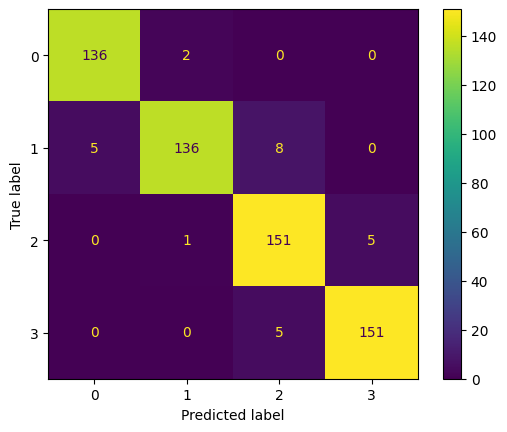

In [28]:
Y_pred_svc=svc.predict(X_test)

plot_confusion_matrix(svc,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_pred_svc))
print('f1_score: ',f1_score(Y_test,Y_pred_svc,average=None))
print('Precision: ', precision_score(Y_test,Y_pred_svc,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_pred_svc,average='weighted'))

In [30]:
Y_pred_svc[:5]

array([2, 0, 0, 2, 1], dtype=int64)

In [150]:
Y_test[:5]

array([[2],
       [0],
       [0],
       [2],
       [1]], dtype=int64)

# DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(max_depth=7,criterion="gini",random_state =4)

In [32]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7, random_state=4)

LGC result:
Accuracy:  0.8433333333333334
f1_score:  [0.90140845 0.79591837 0.79113924 0.88888889]
Precision:  0.8434692675545573
Recall:  0.8433333333333334


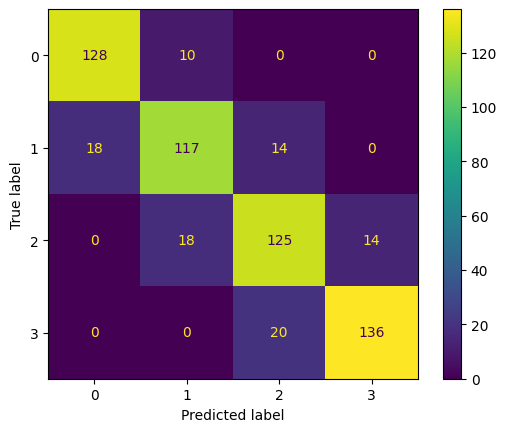

In [33]:
Y_pred_dt=dt.predict(X_test)


plot_confusion_matrix(dt,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_pred_dt))
print('f1_score: ',f1_score(Y_test,Y_pred_dt,average=None))
print('Precision: ', precision_score(Y_test,Y_pred_dt,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_pred_dt,average='weighted'))

# RandomForestClassifier

In [34]:
Randamforest=RandomForestClassifier(max_depth=18, criterion="gini", n_estimators=200,random_state =4)

In [35]:
Randamforest.fit(X_train,Y_train)

RandomForestClassifier(max_depth=18, n_estimators=200, random_state=4)

LGC result:
Accuracy:  0.8433333333333334
f1_score:  [0.90140845 0.79591837 0.79113924 0.88888889]
Precision:  0.8434692675545573
Recall:  0.8433333333333334


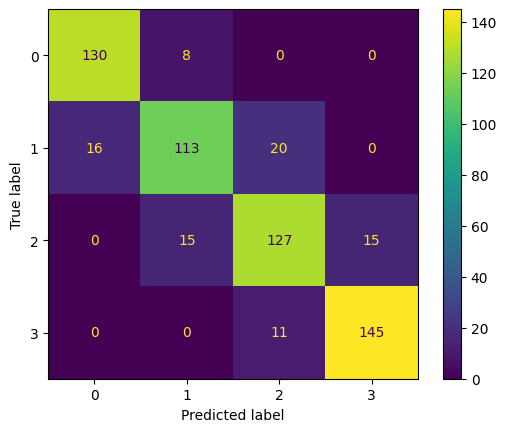

In [36]:
Y_pred_rd=dt.predict(X_test)


plot_confusion_matrix(Randamforest,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_pred_rd))
print('f1_score: ',f1_score(Y_test,Y_pred_rd,average=None))
print('Precision: ', precision_score(Y_test,Y_pred_rd,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_pred_rd,average='weighted'))

# Conclusion

SVC has the highest score of all above algorithms.

# Predicted Test data values

In [37]:
#Load test data
df_test=pd.read_csv("test.csv")
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [38]:
#checking the null values in the test data
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [39]:
df_test=df_test.drop(['id'],axis=1)

In [40]:
df_test.duplicated().sum()

0

In [206]:
df_test["sc_w"] = df_test["sc_w"].replace(0, 8)
df_test["sc_w"] = df_test["sc_w"].replace(1, 8)
df_test["sc_w"] = df_test["sc_w"].replace(2, 8)
df_test["sc_w"] = df_test["sc_w"].replace(3, 8)
df_test["sc_w"] = df_test["sc_w"].replace(4, 8)
df_test["sc_w"] = df_test["sc_w"].replace(5, 8)
df_test["sc_w"] = df_test["sc_w"].replace(6, 8)
df_test["sc_w"] = df_test["sc_w"].replace(7, 8)

In [41]:
df_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [42]:
df_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [44]:
df_test[df_test['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,986,0,2.8,0,0,1,26,0.1,80,8,9,0,1214,1316,7,5,8,1,0,0
819,1992,1,1.3,1,8,1,43,1.0,153,5,15,0,883,2179,7,6,20,1,1,0


In [45]:
# to drop that values of rows
df_test = df_test.drop(index=[420, 819])


In [46]:
# Normalize the data
df_n_test=pd.DataFrame()
for i in df_test.columns:
  df_n_test[[i]]=sc.fit_transform(df_test[[i]])

In [47]:
df_n_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.474652,0.968434,0.313894,0.966493,2.108033,-0.972327,-1.579944,-1.489379,1.535034,-0.578961,0.976026,-0.930926,0.390778,1.227775,-0.001161,0.397058,-1.653078,-1.757886,1.0,-1.016163
1,-0.942295,0.968434,-1.254849,0.966493,-0.133170,1.028461,1.508221,1.008173,1.477589,0.295836,0.319863,0.272126,-0.871316,1.612770,-1.391024,-1.253061,-0.742708,0.568865,-1.0,-1.016163
2,1.294054,0.968434,1.520618,-1.034669,-0.805530,-0.972327,-0.366736,1.364966,1.333974,-0.578961,-0.992462,1.484433,0.286172,0.235424,1.157059,1.104252,-0.196487,-1.757886,1.0,0.984094
3,0.689823,-1.032595,-1.254849,0.966493,3.004514,1.028461,-0.477028,-0.062206,-1.251086,1.608031,1.632188,-0.771290,1.163953,1.610933,-0.464448,-1.253061,-0.742708,0.568865,1.0,-1.016163
4,0.430536,-1.032595,-0.168796,-1.034669,1.435672,1.028461,0.846472,-0.062206,-0.906412,0.733234,1.304107,0.279067,-0.978197,-0.337016,0.693771,0.632790,-0.742708,0.568865,-1.0,0.984094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1.046343,0.968434,0.434566,-1.034669,-1.029651,1.028461,1.122201,-0.062206,0.874408,1.170633,1.140066,0.036143,-0.743970,-0.017258,0.462127,0.632790,0.713883,0.568865,1.0,-1.016163
994,-1.479389,-1.032595,0.313894,0.966493,-1.029651,-0.972327,-1.138778,1.364966,1.333974,-0.141563,-1.320544,1.211432,0.891067,-0.190001,-0.927736,-1.017329,1.442179,-1.757886,1.0,0.984094
995,-0.145914,-1.032595,-0.168796,-1.034669,-0.805530,1.028461,-1.414507,-0.062206,-1.710653,-1.453758,0.319863,-0.350222,-0.944086,-0.842380,-1.622667,-1.253061,0.531809,0.568865,-1.0,-1.016163
996,0.659727,0.968434,-1.254849,0.966493,-1.029651,-0.972327,0.901617,-0.419000,0.903131,-1.016360,0.319863,-1.365875,-0.928168,0.339253,0.693771,1.339984,-0.924782,-1.757886,1.0,-1.016163


In [48]:
Test_predicted_values=svc.predict(df_n_test)

In [49]:
df_test['predict_values_price']=Test_predicted_values

In [50]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predict_values_price
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [51]:
# Export the predict values to csv 
df_test.to_csv('predicted_test_values.csv',index=True)